# EDA and Linear Regression on Covid 19 Dataset

### The Data is all about the current scenario of Covid19. 
### Covid19 Virus is the deadliest virus that world has encountered in 100 years.
### It is showing how many countries has been effected with this virus and the total cases , recovered cases and the deaths. The data is from 22/1/2020 to 24/4/2020.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
  

### Loading and Reading the Dataframe

In [39]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\ShaliniMam_edu\covid_19_data (2).csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


### Total number of columns

In [40]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

### The Shape of the DF

In [41]:
#df.shape

rows,cols =df.shape

In [42]:
rows

18327

In [43]:
cols

8

### The Dimension of the DF

In [44]:
df.ndim

2

### Description of the DF

In [45]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000,18327.000000
mean,9164.000000,3030.015551,180.680417,764.542424
std,5290.693527,15129.079515,1362.099905,5618.658958
min,1.000000,0.000000,0.000000,0.000000
25%,4582.500000,9.000000,0.000000,0.000000
50%,9164.000000,101.000000,1.000000,2.000000
75%,13745.500000,674.500000,8.000000,71.000000
max,18327.000000,271590.000000,25969.000000,109800.000000


### All information about the DF

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              18327 non-null  int64  
 1   ObservationDate  18327 non-null  object 
 2   Province/State   9050 non-null   object 
 3   Country/Region   18327 non-null  object 
 4   Last Update      18327 non-null  object 
 5   Confirmed        18327 non-null  float64
 6   Deaths           18327 non-null  float64
 7   Recovered        18327 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


### Setting "SNo" as index columns

In [47]:
df1 = df.set_index('SNo')
df1

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


### Renaming the column name

In [48]:
df1 = df1.rename(columns = { 'ObservationDate' : 'Date', 'Province/State' : 'State' , 'Country/Region' : 'Country'} )
df1

,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


### Records for countries for confirmed cases

In [49]:
df1.groupby('Country')['Confirmed'].sum().sort_values(ascending = False)

Country
US                       14592049.0
Mainland China            6148522.0
Italy                     4936614.0
Spain                     4735954.0
Germany                   3574181.0
                            ...    
Republic of the Congo           1.0
North Ireland                   1.0
East Timor                      1.0
Channel Islands                 1.0
 Azerbaijan                     1.0
Name: Confirmed, Length: 220, dtype: float64

### Records for countries for Recovered cases

In [50]:
df1.groupby('Country')['Recovered'].sum().sort_values(ascending = False)

Country
Mainland China     4235593.0
Germany            1562158.0
Spain              1551918.0
Iran               1175277.0
US                 1058042.0
                     ...    
Faroe Islands            0.0
East Timor               0.0
Curacao                  0.0
Channel Islands          0.0
 Azerbaijan              0.0
Name: Recovered, Length: 220, dtype: float64

### Getting total number of Deaths around the world.

In [51]:
df1.groupby('Country')['Deaths'].sum().sort_values(ascending = False)

Country
US             631505.0
Italy          597687.0
Spain          460470.0
France         367150.0
UK             270200.0
                 ...   
Maldives            0.0
Mayotte             0.0
Mongolia            0.0
Mozambique          0.0
 Azerbaijan         0.0
Name: Deaths, Length: 220, dtype: float64

### Extracting records for countries having cases

In [52]:
df1.loc[: ,['Country' , 'State' , 'Confirmed', 'Recovered' , 'Deaths' ]]

,Country,State,Confirmed,Recovered,Deaths
SNo,,,,,
1,Mainland China,Anhui,1.0,0.0,0.0
2,Mainland China,Beijing,14.0,0.0,0.0
3,Mainland China,Chongqing,6.0,0.0,0.0
4,Mainland China,Fujian,1.0,0.0,0.0
5,Mainland China,Gansu,0.0,0.0,0.0
...,...,...,...,...,...
18323,US,Wyoming,473.0,0.0,7.0
18324,Mainland China,Xinjiang,76.0,73.0,3.0
18325,Canada,Yukon,11.0,0.0,0.0


### Total Confirmed cases as of 24 april 2020

In [53]:
df1['Confirmed'].sum()

55531095.0

### Total Recovered cases as of 24 april 2020

In [54]:
df1['Recovered'].sum()

14011769.0

### Total Death cases as of 24 april 2020

In [55]:
df1['Deaths'].sum()

3311330.0

### Cases in India

In [56]:
India = df1.loc[df1['Country']== 'India']
India

,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...
16804,04/20/2020,NaN,India,2020-04-20 23:44:50,18539.0,592.0,3273.0
17124,04/21/2020,NaN,India,2020-04-21 23:39:09,20080.0,645.0,3975.0
17444,04/22/2020,NaN,India,2020-04-22 23:38:57,21370.0,681.0,4370.0


In [57]:
India.drop('State' , axis = 1 , inplace = True)

 ### Total Confirmed,  Recovered and Death cases in India

In [58]:
confirm = India.loc[: ,'Confirmed'].sum()
print("Total Confirmed cases in India are : " , confirm)

Total Confirmed cases in India are :  275072.0


In [59]:
recover = India.loc[: ,'Recovered'].sum()
print("Total Recovered cases in India are : " , recover)

Total Recovered cases in India are :  41824.0


In [60]:
death = India.loc[: ,'Deaths'].sum()
print("Total Death cases in India are : " , death)

Total Death cases in India are :  8757.0


# Visualization

In [61]:
df1

,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0


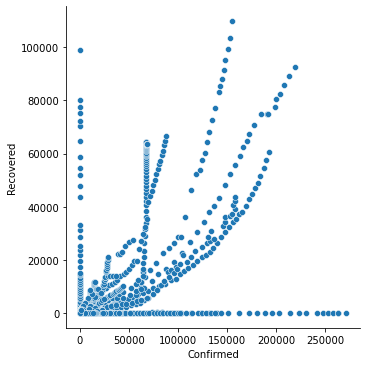

In [62]:
sns.relplot(x = 'Confirmed' , y = 'Recovered' , data = df1 )

# Applying Linear Regression Algorithm on the Covid19 Dataset

### Histogram for the DF

array([[<AxesSubplot:title={'center':'SNo'}>,
        <AxesSubplot:title={'center':'Confirmed'}>],
       [<AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Recovered'}>]], dtype=object)

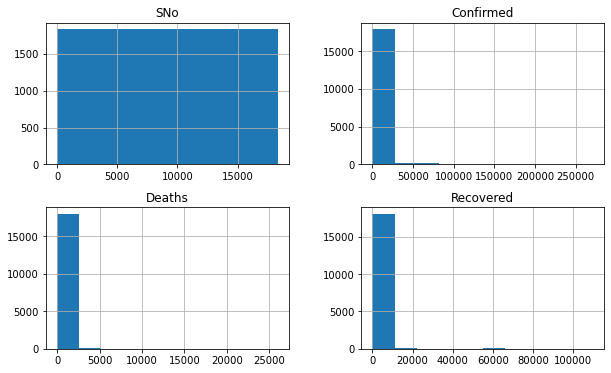

In [63]:
df.hist(figsize =( 10 , 6))

### Dist plot for the DF

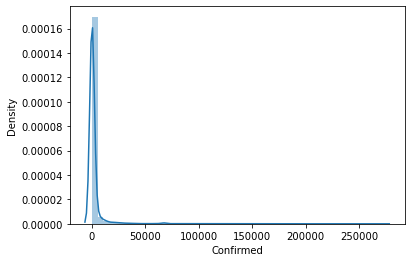

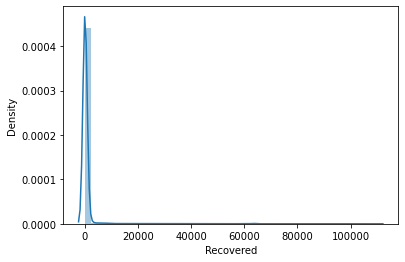

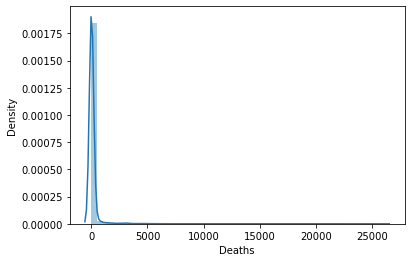

In [64]:

sns.distplot(df['Confirmed'])
plt.show()

sns.distplot(df['Recovered'])
plt.show()

sns.distplot(df['Deaths'])
plt.show()

### Plotting the pairplot

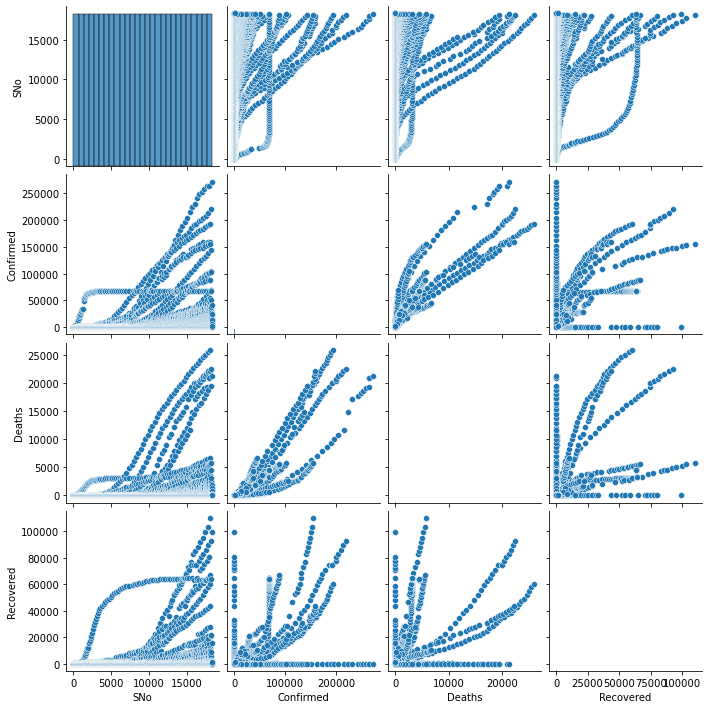

In [65]:
sns.pairplot(df)

### Plotting the Scatter plot to see if the data is in Linear or not.

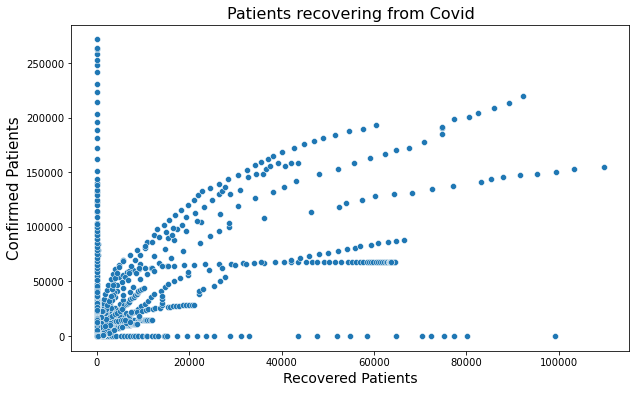

In [66]:
plt.figure(figsize = (10 , 6))
sns.scatterplot(x = df['Recovered'],
               y = df['Confirmed'])
plt.title ('Patients recovering from Covid' , size = 16)
plt.xlabel('Recovered Patients' , size = 14)
plt.ylabel('Confirmed Patients', size = 15)
plt.show()

### Plotting the Regresssion plot and it is showing that our data is in Linear Regression form

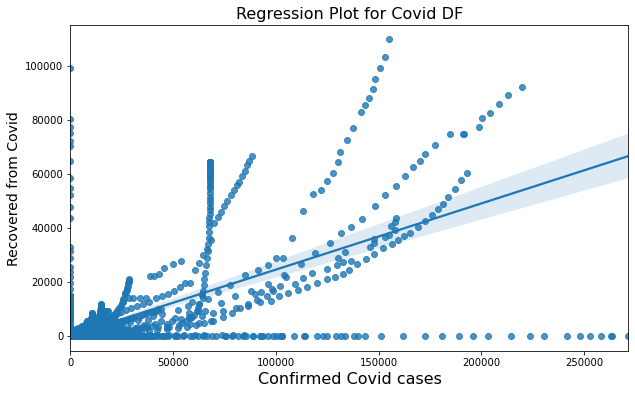

In [67]:
plt.figure(figsize = (10 , 6))
sns.regplot(y = df['Recovered'], 
           x = df['Confirmed'])
plt.title('Regression Plot for Covid DF' , size = 16)
plt.xlabel('Confirmed Covid cases' , size = 16)
plt.ylabel('Recovered from Covid' , size = 14)
plt.show()

### Correlation

<AxesSubplot:>

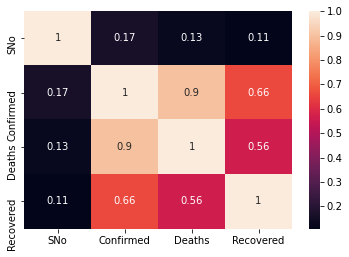

In [68]:
sns.heatmap(df.corr(), annot = True)

### Dropping the string type Columns

In [69]:
data = df.loc[:, ['Confirmed' , 'Recovered' , 'Deaths']]
data

,Confirmed,Recovered,Deaths
0,1.0,0.0,0.0
1,14.0,0.0,0.0
2,6.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
18322,473.0,0.0,7.0
18323,76.0,73.0,3.0
18324,11.0,0.0,0.0
18325,185.0,180.0,2.0


### For getting the separate values in rows and cols

In [70]:
x = data.iloc[::-1].values
y = data.iloc[:,1].values
x

array([[1.268e+03, 1.256e+03, 1.000e+00],
       [1.850e+02, 1.800e+02, 2.000e+00],
       [1.100e+01, 0.000e+00, 0.000e+00],
       ...,
       [6.000e+00, 0.000e+00, 0.000e+00],
       [1.400e+01, 0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00]])

In [71]:
y

array([   0.,    0.,    0., ...,    0.,  180., 1256.])

## Importing the Sklearn module to train the splitted data

In [72]:
from sklearn.model_selection import train_test_split

### Perform the split into train and test data

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)

In [90]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape) 

## spliting them accordingly.80% training data and 20% test data

(16494, 3)
(1833, 3)
(16494,)
(1833, 3)


### Print the mean values

In [91]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))


1326.3333333333333
1313.7966903073286
756.8475809385232
833.7834151663939


### FIT()

**FIT() used to check the accurate data which just the weight for better accuracy**

In [92]:
from sklearn.linear_model import LinearRegression

l = LinearRegression()
l.fit(x_train , y_train)
print('Train Test Complete')

Train Test Complete


In [93]:
y_pred = l.predict(x_test)
y_pred

array([719.20290275, 777.54494651, 735.86523376, ..., 780.50545221,
       780.29640277, 770.33310429])

In [94]:
d1 = pd.DataFrame({'Actual': y_test , 
                  'Predicted':y_pred})
d1

,Actual,Predicted
0,4.0,719.202903
1,0.0,777.544947
2,0.0,735.865234
3,0.0,778.595029
4,0.0,780.505452
...,...,...
1828,0.0,780.095197
1829,0.0,780.376379
1830,18.0,780.505452
1831,34211.0,780.296403


In [95]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error" , mean_absolute_error(y_test , y_pred))

Mean Absolute Error 1380.8989053193607


### Plotting the Regression Plot

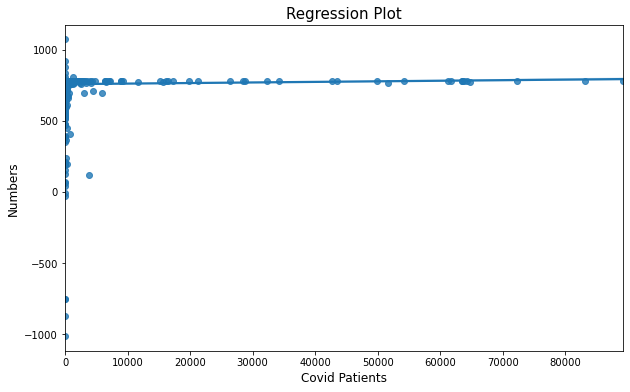

In [96]:
plt.figure(figsize = (10, 6))
sns.regplot(x = y_test , y = y_pred)
plt.title('Regression Plot' , size = 15)
plt.ylabel('Numbers' , size = 12)
plt.xlabel('Covid Patients' , size = 12)
plt.show()

# Conclusion:

The covid Cases are increasing day by day and also the deaths.On 22nd January 2020 at the Anhui province of Mainland China the first covid case was reported. By the end of 24th April 2020,United States of America has the highest number of confirmed cases.Germany has the highest number of recoveries from the covid and Italy lost most people due to covid.¶